# Week 10 - Introduction to Artificial Neural Networks


Today in the lecture you got the introduction to Artificial neural networks (ANN). You learned about the following topics:
- perceptron: single layer [[1](###References)]
- activation functions (Adaptive Linear Neuron: AdaLine) [[2](#References)]
- gradient descent
- multilayer perceptron

This workshop is going to focus on the very basics behind neural networks: **the perceptron**. The workshop will be a combination of **examples** and **four (4) excercises**. We will go through the _examples_ together, and you will be given some time to solve each _excercise_ as we work through this notebook.

We will show how to implement our own perceptron, as well as how to use the `sklearn` implementations. At the end, we will also showcase the multi-layer perceptron (from `sklearn`) as an introduction for the coming lesson and workshop.

The workshop will demonstrate the following concepts:
- [Linear functions](#Linear-functions)
    - [Exercise 1](#Exercise-1)
- [Single layer perceptron](#Single-layer-perceptron)
    - [Convergence of the perceptron](#Convergence-of-the-perceptron)
    - [Exercise 2](#Exercise-2)
- [Linear separability](#Linear-separability)
    - [Exercise 3](#Exercise-3)
    - [Example-XOR-function](#Example-XOR-function) - kernel trick and showcase of multi-layer perceptron
- [Exercise 4](#Exercise-4)
- [References](#References)

## Linear functions

Let's revise some maths about linear functions. A linear function $f(x)$ in 2D can be expressed as:
\begin{equation*}
f(x) = y = ax + b
\end{equation*}
Here, $a$ is the _slope_ of the line, and $b$ is the _shift_.

-----------

But, when we talk about (2 class) classification for 2D samples (2 features - e.g. sepal length and petal length), we often talk about a **decision surface** instead. We evaluate it on a sample $\textbf{x} = [x_1, x_2]$:
\begin{equation*}
w_0 + w_1 x_1 + w_2 x_2 = 0
\end{equation*}

-----------

We classify as positive all the samples that fall "above" the decision surface:
\begin{equation*}
w_0 + w_1 x_1 + w_2 x_2 > 0,
\end{equation*}
and as negative all the samples that fall "under":
\begin{equation*}
w_0 + w_1 x_1 + w_2 x_2 < 0,
\end{equation*}

------------

A linear decision function for _nD_ samples will be a hyperplane:
\begin{equation*}
w_0 + w_1 x_1 + \dots + w_n x_n = 0,
\end{equation*}

------------


"Maths trick": extend our input samples with a leading component $x_0 = 1$ for all samples:
\begin{equation*}
    \mathbf{x}' =
    \begin{bmatrix}
        1 \\
        \mathbf{x}
    \end{bmatrix},
\end{equation*}
and we unify all the weights and the bias in a weights vector $\mathbf{w}$:
\begin{equation*}
    \mathbf{w} = 
    \begin{bmatrix}
        w_0 \\
        w_1 \\
        \cdots \\
        w_n
    \end{bmatrix},
\end{equation*}
we end with a short notation of an _nD_ decision function in vector form:
\begin{equation}
\mathbf{w}^\intercal \mathbf{x}'\ = 0
\end{equation}
(here $\mathbf{w}^\intercal \mathbf{x}'$ is a _dot product_ between the weights $\mathbf{w}$ and the sample $\mathbf{x}'$).

Let's remind ourselves of the influence of the weights and bias for 2D linear functions.

### Exercise 1

Below is the code that plots the samples of setosa and versicolor irises. The below code classifies them according to the decision surface $\mathbf{w}^\intercal \mathbf{x}'\ = 0$ defined by the vector $\mathbf{w}$.

More specifically, the samples will be classified as `setosa` if:
\begin{equation*}
w_0 + w_1 x_1 + w_2 x_2 > 0,
\end{equation*}
otherwise they will be classified as `versicolor`.

The current _weights_ and _biases_ do not classify the samples correctly. Change the weights and biases (stored together in `w`):
- Check what happens when you double all the weights and biases. Try to double them. How does the decision surface change?
- Find the weights and biases which classify the samples correctly. Are these unique?
- (The left and right subplot showing samples classified by the linear decision surface defined by $\mathbf{w}$ and the ground truth should be the same when successful).

In [58]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

plt.rcParams.update({'font.size': 20})

iris = datasets.load_iris()
# get length and width features
X_length = iris.data[:, [0,2]]
X_width = iris.data[:, [1,3]]

# We will work with sepal and petal area for 2D - multipy length with width
X_area_full = X_length * X_width
y_full = iris.target

class_names = iris.target_names
feature_names = ["sepal area", "petal area"]

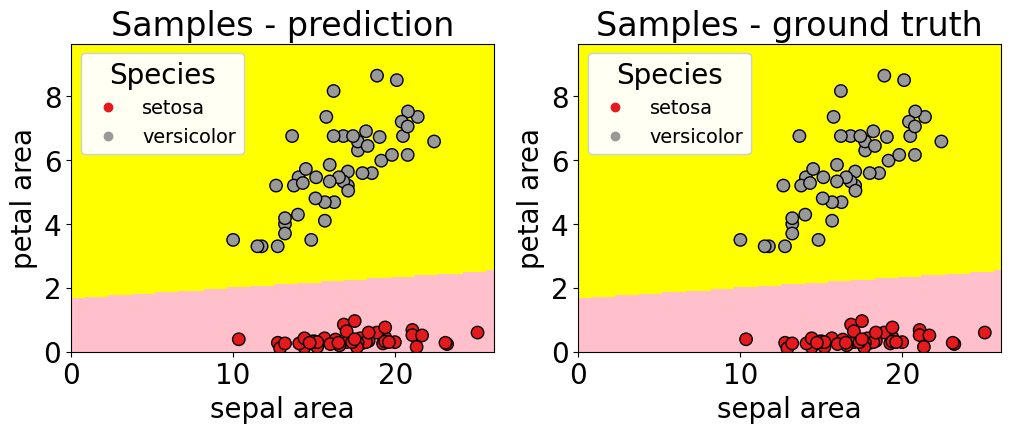

In [59]:
from matplotlib.colors import ListedColormap

# Select the data for this example:
# select samples with class == 0 or == 1
select = np.any([y_full == 0, y_full==1], axis = 0)

# construct the data to work with
X = X_area_full[select, :]
y = y_full[select]
y = np.where(y == 0, -1, 1) # change between classes: (0, 1) to classes: (-1, 1)


# set some nice plotting limits
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
x_min = min(x_min, 0)
y_min = min(y_min, 0)
x_max += 1
y_max += 1

# Adding x_0 = 1 for every sample (so we can do the dot product)
X_prime = np.hstack((np.ones((X.shape[0], 1)), X))

#####################################################################################################
#####################################################################################################
#####################################################################################################
# Change the following bit of code:
# Find the correct weights for the decision surface. What happens if you double all the weights?
w = np.array([25, #w0
              0.5,  #w1
              -15  #w2
             ])[:, np.newaxis]

#####################################################################################################
#####################################################################################################
#####################################################################################################


# Classifying using the decision surface defined with the weights above. 
# Calculate the dot product:
#    - all points "above" the surface = positive class
#    - all points "below" the surface = negative class
y_prediction = np.dot(X_prime, w) < 0


# Plot different things:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot decision surface
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
surface = np.c_[xx.ravel(), yy.ravel()]
surface_prime = np.hstack((np.ones((surface.shape[0], 1)), surface))
Z = np.dot(surface_prime, w) < 0
Z = Z.reshape(xx.shape)
cmap_light = ListedColormap(['pink', 'yellow'])
axs[0].pcolormesh(xx, yy, Z, cmap = cmap_light, shading = 'auto')
axs[1].pcolormesh(xx, yy, Z, cmap = cmap_light, shading = 'auto')

# Currently, the below two scatter plots will give you different outputs
# If you find the correct weights and biases, the below two scatter plots
# will have the same input regardless of which is used.

# Plot the output of linear classifier for training points
scatter0 = axs[0].scatter(X_prime[:, 1], X_prime[:, 2], c=y_prediction, cmap=plt.cm.Set1,
                 edgecolor='k', s=80)

# Plot the training points with ground truth
scatter1 = axs[1].scatter(X_prime[:, 1], X_prime[:, 2], c=y, cmap=plt.cm.Set1,
                 edgecolor='k', s=80)

# Plot the legend, label your axis:
handles0, labels0 = scatter0.legend_elements()
legend0 = axs[0].legend(handles0, class_names, loc = "upper left", title = "Species", fontsize='x-small')
axs[0].add_artist(legend0)
axs[0].set_title('Samples - prediction')
handles1, labels1 = scatter1.legend_elements()
legend1 = axs[1].legend(handles1, class_names, loc = "upper left", title = "Species", fontsize='x-small')
axs[1].add_artist(legend1)
axs[1].set_title('Samples - ground truth')
for ax in axs:
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

plt.show()

## Single-layer perceptron

Rosenblatt's perceptron [[1](###References)] is a **linear classifier**, just like the SVM (with a linear kernel). 

Below, we directly implement this learning algorithm. The training of a single perceptron (the `fit` function) is implemented in the following steps:
- randomly initialise the weights $\mathbf{w}$
- repeat for `n_iter` (maximum number of iterations)
     - repeat for every sample $\textbf{x}_i$ in the training set `X`:
          - evaluate if $\textbf{x}_i$ falls "above" or "below" the decision surface
          - compare to the expected `target` for `xi`
          - if $\textbf{x}_i$ is correctly classified, do nothing
          - if $\textbf{x}_i$ is not correctly classified:
               - for positive samples $\textbf{x}_i$ add $\eta*\textbf{x}_i$ to $\textbf{w}$
               - for negative samples $\textbf{x}_i$ subtract $\eta*\textbf{x}_i$ from $\textbf{w}$
     
In this implementation, we will always run `n_iter` epochs. Instead, one can add different **stopping criteria**: for example, we can stop the update when the number of incorrect classifications in a single iteration (also sometimes: _epoch_) reaches 0, or stops improving.

The below examples are heavily influenced by the implementations provided through [this free book](https://github.com/rasbt/python-machine-learning-book-3rd-edition) (it comes with public jupyter notebooks for all examples in the book so feel free to check it out). It has been changed to reflect the maths at the beginning of the workshop (i.e. adding $x_0=1$ to every sample).

In [60]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        
        # we add the "1"
        X_prime = np.hstack((np.ones((X.shape[0], 1)), X))
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X_prime, y):
              #checking if sample is misclassified
                if target * self.net_output(xi) < 0:
                #if (self.net_output(xi) > 0 and target == -1) or (self.net_output(xi) <= 0 and target == 1):
                    update = self.eta * target # target has sign
                else:
                    update = 0
                    #errors += 1
                self.w_ += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_output(self, X_prime):
        """Calculate net input"""
        return np.dot(X_prime, self.w_)

    def predict(self, X):
        """Return class label after unit step"""
        X_prime = np.hstack((np.ones((X.shape[0], 1)), X))
        return np.where(self.net_output(X_prime) >= 0.0, 1, -1)

### Convergence of the perceptron

The speed of convergence depends on the learning rate, $\eta$ (`eta`). Continuing with _setosa_ and _versicolor_ iris classification, train a single perceptron given above for 10 iterations with learning rates $\eta = \{0.1, 0.0001, 0.00001\}$.

The code snipped below also prints out the weights $\textbf{w}$. Try using these values in [Excercise 1](#Excercise-1). Does the decision surface defined by them classify the samples correctly?

[-0.08375655 -0.11111756  1.85671828]


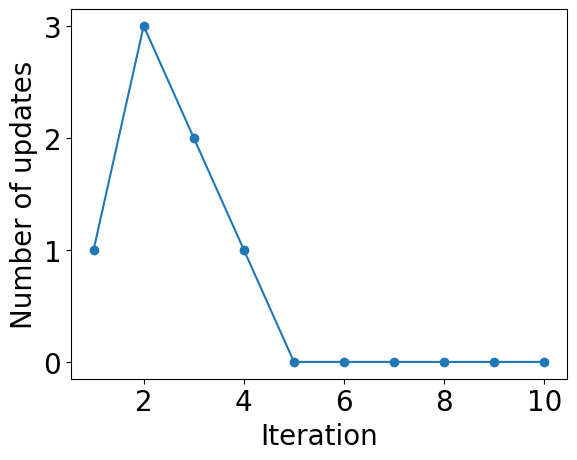

In [61]:
# Initialise model
ppn = Perceptron(eta=0.1, n_iter=10)

# Fit the model to the data
ppn.fit(X, y)

# Plot the error vs the number of iterations
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')

# Label the axis
plt.xlabel('Iteration')
plt.ylabel('Number of updates')

print(ppn.w_)

plt.show()

### Exercise 2

**Comparison to other linear classifiers.** Let's compare the properties of the decision surface learned by the perceptron to the decision surface learned by another linear classifier: _SVM_ (with a linear kernel). We continue using the _setosa_ and _virginica_ iris data.

----------

Fill the gaps in the code below.

Fill the **first gap** such that:
- you import the appropriate `sklearn` packages. Careful for the name clash with our own implementation of `Perceptron`.
- `sklearn` implementation of perceptron is located at [`sklearn.linear_model.Perceptron`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)
- `sklearn` implementation is SVM located at [`sklearn.svm.SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) 

Fill the **second gap** such that:
- `c_our_perceptron` initialises a `Perceptron` classifier of our own implementation with $\eta=0.1$ and 20 iterations (we called the argument `n_iter`)
- `c_perceptron` initialises a perceptron classifier from `sklearn`, for 20 iterations and with $\eta=0.001$. The arguments are called `eta0` and `max_iter`
- `c_svm` initialises a _SVM_ classifier with a linear kernel (parameter `kernel`)

Fill the **third gap** such that:
- you fit each of the three classifiers to our data (stored in `X` and `y`)

Fill the **fourth gap** such that:
- use each of the fitted classifiers to classify the input data again. Since it is linearly separable, we expect perfect classification in all cases.
- store the classification output of `c_our_perceptron` in `y_our_perceptron`. Classification output and decision surface will be shown in first subplot.
- store the classification output of `c_perceptron` in `y_perceptron`. This will be shown in the second subplot.
- store the classification output of `c_svm` in `y_svm`. This will be shown in the third subplot.

----------

When you are done, **compare the resulting decision surfaces**:
- Our "bare bones" implementation of the _perceptron_ stops as soon as it finds a decision surface which correctly classifies the training samples.
- The `sklearn` implementation has a more sophisticated _stopping criterion_: keeps improving the decision surface beyond "first good find"
- The _SVM_ algorithm is formulated such that it finds "support vectors" that limit the distance to the training samples of different classes. This forces a "gap" between the decision surface and the samples.
- How do the three decision surfaces compare?

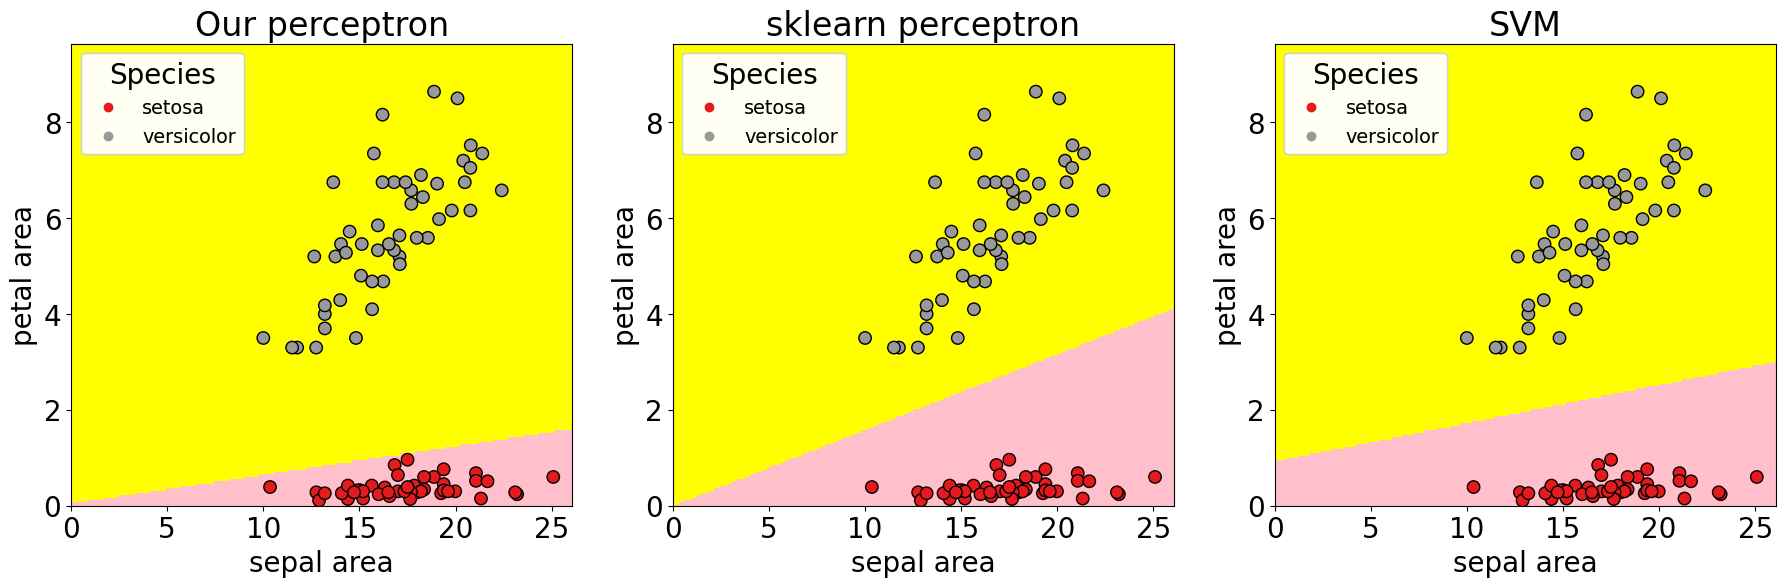

In [62]:
#####################################################################################################
#####################################################################################################
#####################################################################################################
# Required imports go here
import sklearn.linear_model
from sklearn.svm import SVC
#####################################################################################################
#####################################################################################################
#####################################################################################################
# Initialise the ML models
c_our_perceptron = Perceptron(eta=0.1 , n_iter=20)
c_perceptron = sklearn.linear_model.Perceptron(eta0=0.001, max_iter = 20)
c_svm = SVC(kernel='linear')
#####################################################################################################
#####################################################################################################
#####################################################################################################
# Fit models to the data (using the 'fit' function)
c_our_perceptron.fit(X,y)
c_perceptron.fit(X,y)
c_svm.fit(X,y)
#####################################################################################################
#####################################################################################################
#####################################################################################################
# Predict the training samples again
y_our_perceptron= c_our_perceptron.predict(X)
y_perceptron = c_perceptron.predict(X)
y_svm = c_svm.predict(X)
#####################################################################################################
#####################################################################################################
#####################################################################################################


# Plot different things:
fig, axs = plt.subplots(1, 3, figsize=(22, 6))

clfs = [c_our_perceptron, c_perceptron, c_svm]
outputs = [y_our_perceptron, y_perceptron, y_svm]

# "run" across all different outputs, classifiers and axis
# that's why I use .subfigure :)
for y, clf, ax in zip(outputs, clfs, axs):
    # Plot decision surface
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    surface = np.c_[xx.ravel(), yy.ravel()]
    #surface_prime = np.hstack((np.ones((surface.shape[0], 1)), surface))
    #Z = np.dot(surface_prime, w) > 0
    Z = clf.predict(surface)
    Z = Z.reshape(xx.shape)
    cmap_light = ListedColormap(['pink', 'yellow'])
    ax.pcolormesh(xx, yy, Z, cmap = cmap_light, shading = 'auto')

    # Plot the output
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
                 edgecolor='k', s=80)

    # Plot the legend, label your axis:
    handles, labels = scatter.legend_elements()
    legend = ax.legend(handles, class_names, loc = "upper left", title = "Species", fontsize='x-small')
    ax.add_artist(legend)

    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
axs[0].set_title('Our perceptron')
axs[1].set_title('sklearn perceptron')
axs[2].set_title('SVM')

plt.show()

## Linear separability

Until now, we worked with _setosa_ and _versicolor_ iris flowers. These classes are linearly separable (we were able to fit a line between them in [Excercise 1](#Excercise-1). Now, let's work with _versicolor_ and _virginica_ iris instead.

The data looks like this:

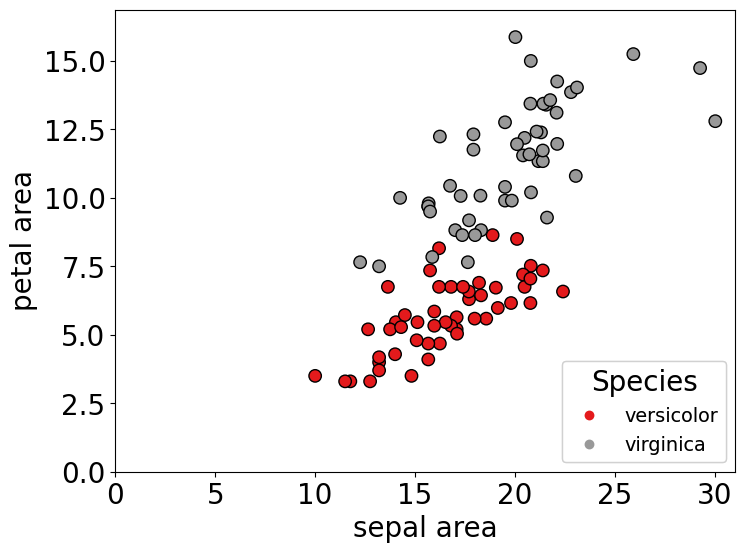

In [63]:
# Select the data for this example:
# select samples with class == 1 or == 2
select = np.any([y_full == 1, y_full==2], axis = 0)

# construct the data to work with
X = X_area_full[select, :]
y = y_full[select]
y = np.where(y == 1, -1, 1) # change between classes: (1, 2) to classes: (-1, 1)

# set some nice plotting limits
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
x_min = min(x_min, 0)
y_min = min(y_min, 0)
x_max += 1
y_max += 1

fig, ax = plt.subplots(1, figsize=(8, 6))

# plot our samples
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k', s=80)
handles, labels = scatter.legend_elements()
# add the legend
legend = ax.legend(handles, class_names[1:], loc = "lower right", title = "Species", fontsize='x-small')
ax.add_artist(legend)
# and label the axes
ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[1])

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

plt.show()

Let's try and train our "bare bones" perceptron implementation on the data above instead, and plot the results. Experiment with replacing the classifier with a `sklearn` implementation of _perceptron_ or _SVM_.

Notice that our implementation of the perceptron allows setting the random state (the seed which will be used to initialise the weights before training). If we change the random states (i.e. randomly re-initialise the weights and re-train the perceptron), does the _decision surface_ change?

Did we succeed in classifying the training samples?

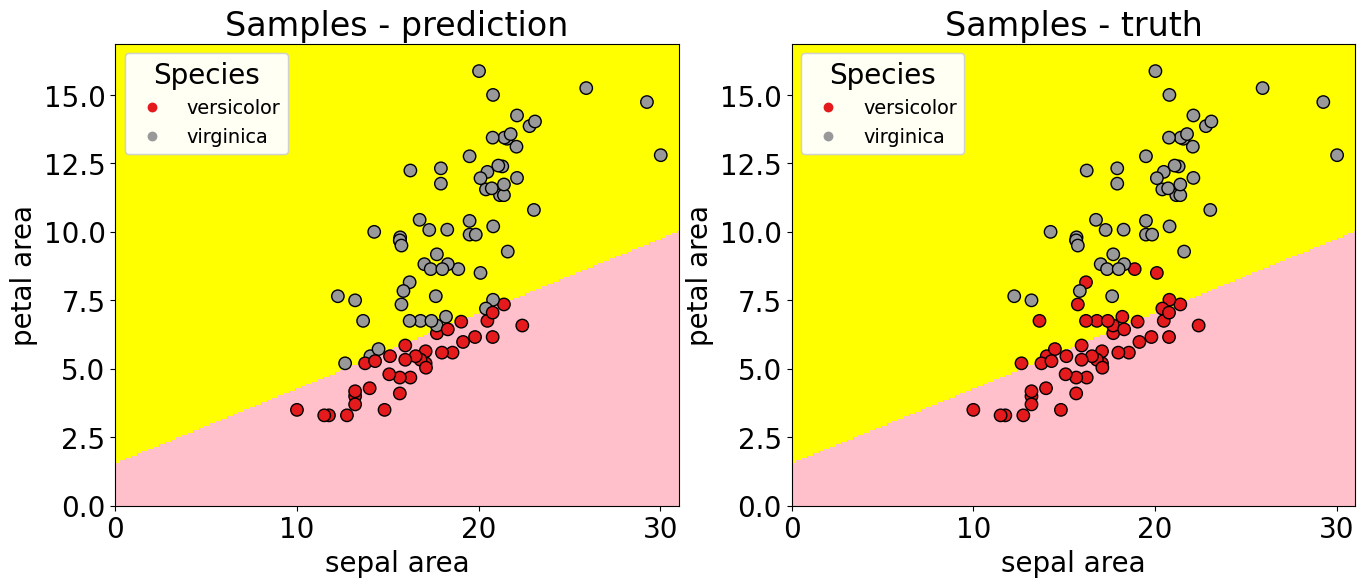

In [64]:
# Initialise the ML model
clf = Perceptron(eta=0.1, n_iter=500, random_state = 50)
# Fit models to the data
clf.fit(X, y)
# Predict the training samples again
y_prediction = clf.predict(X)

# Plot different things:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

clfs = [clf, clf]
outputs = [y_prediction, y]

for y, clf, ax in zip(outputs, clfs, axs):
    # Plot decision surface
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    surface = np.c_[xx.ravel(), yy.ravel()]
    Z = clf.predict(surface)
    Z = Z.reshape(xx.shape)
    cmap_light = ListedColormap(['pink', 'yellow'])
    ax.pcolormesh(xx, yy, Z, cmap = cmap_light, shading = 'auto')

    # Plot the output
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
                 edgecolor='k', s=80)

    # Plot the legend, label your axis:
    handles, labels = scatter.legend_elements()
    legend = ax.legend(handles, class_names[1:], loc = "upper left", title = "Species", fontsize='x-small')
    ax.add_artist(legend)

    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
axs[0].set_title('Samples - prediction')
axs[1].set_title('Samples - truth')

plt.show()

### Exercise 3

Observe how the number of samples/errors per "epoch" changes when training a perceptron for _versicolor_ and _virginica_ iris classification. As mentioned in the example above, these two classes are not **linearly separable**.

Train our own perceptron model with $\eta=0.1$ for 10 iterations (you can use the training samples `X` and `y` initialised above), and plot the number of wrongly classified samples in each iteration (corresponding to the number of updates). Also try the following:
- Change the value of $\eta$.
- Increase the number of iterations to 100.

Does the number of errors converge? Decrease?

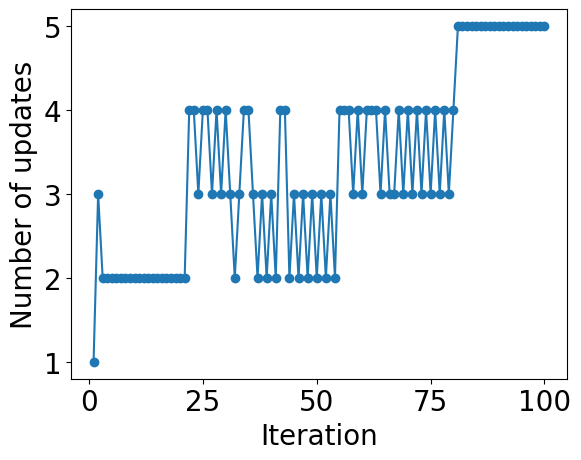

In [65]:
#Initialise model:
percep = Perceptron(eta=0.01, n_iter=100)

# Fit the model to the data:
percep.fit(X,y)
# Plot the error vs the number of iterations:
plt.plot(range(1, len(percep.errors_) + 1), percep.errors_, marker='o')
# Label the axis
plt.xlabel('Iteration')
plt.ylabel('Number of updates')

plt.show()

### Example - XOR function

We don't need to look to complex real data to find linearly inseparable classes. One of the basic logical functions, _XOR_, is also not linearly separable.

Let's apply our `Perceptron` implementation to it. We will plot the number of updates done in every iteration, and the decision surface resulting from 10 iterations.

Can you observe the similarity in the "number of updates" plot between the XOR example and the example with _versicolor_ and _virginica_ iris?

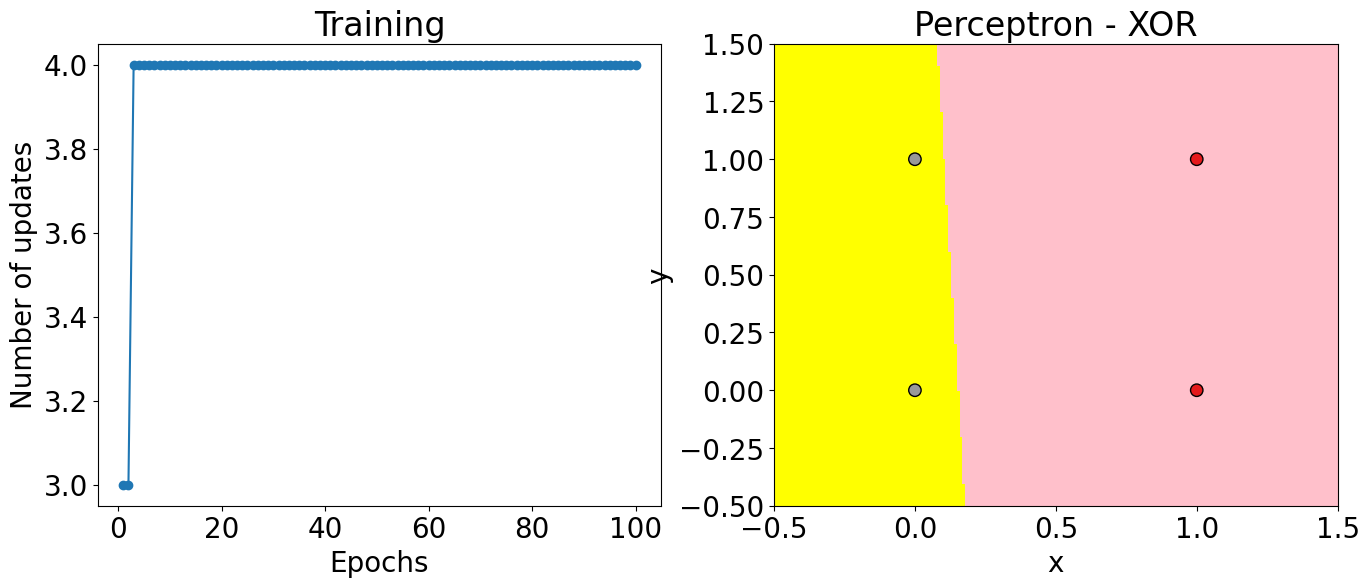

In [69]:
X_xor = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y_xor = np.array([0, 1, 1, 0])

X, y = X_xor, y_xor
y = np.where(y == 0, -1, 1) # change between classes: (0, 1) to classes: (-1, 1)
x_min = y_min = -0.5
x_max = y_max = 1.5

clf = Perceptron(eta=0.1, n_iter=100)
# Fit the data
clf.fit(X, y)

y_predicted = clf.predict(X)

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot the errors
axs[0].plot(range(1, len(clf.errors_) + 1), clf.errors_, marker='o')

# Label the axis
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Number of updates')
axs[0].set_title('Training')


# Plot the decision surface
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
surface = np.c_[xx.ravel(), yy.ravel()]
Z = clf.predict(surface)
Z = Z.reshape(xx.shape)
cmap_light = ListedColormap(['pink', 'yellow'])
axs[1].pcolormesh(xx, yy, Z, cmap = cmap_light, shading = 'auto')

# Plot the XOR function (training data)
scatter = axs[1].scatter(X[:, 0], X[:, 1], c=y_predicted, cmap=plt.cm.Set1,
             edgecolor='k', s=80)
axs[1].set_xlim(x_min, x_max)
axs[1].set_ylim(y_min, y_max)
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_title('Perceptron - XOR')

plt.show()

**Kernel trick**. One way to get around this limitation is using a similar approach as with the _SVM_. The XOR function is not _linearly separable_ in 2D space. However, if we artificially increase the dimensionality of our samples, we may end up in a hyperspace in which the samples _are_ linearly separable.

If our samples are
\begin{equation*}
    \mathbf{x} =
    \begin{bmatrix}
        x_0 \\
        x_1 \\
        x_2
    \end{bmatrix}.
\end{equation*}


We can represent our samples as:
\begin{equation*}
    \mathbf{x}_{\texttt{ext}} =
    \begin{bmatrix}
        x_0 \\
        x_1 \\
        x_2 \\
        x_0^2 \\
        x_1^2 \\
        x_2^2 \\
        x_0 x_1 \\
        x_1 x_2 \\
        x_0 x_2
    \end{bmatrix}.
\end{equation*}

Then, we can solve the _XOR_ problem with our perceptron in 5D (using the extended data) instead of in 2D.

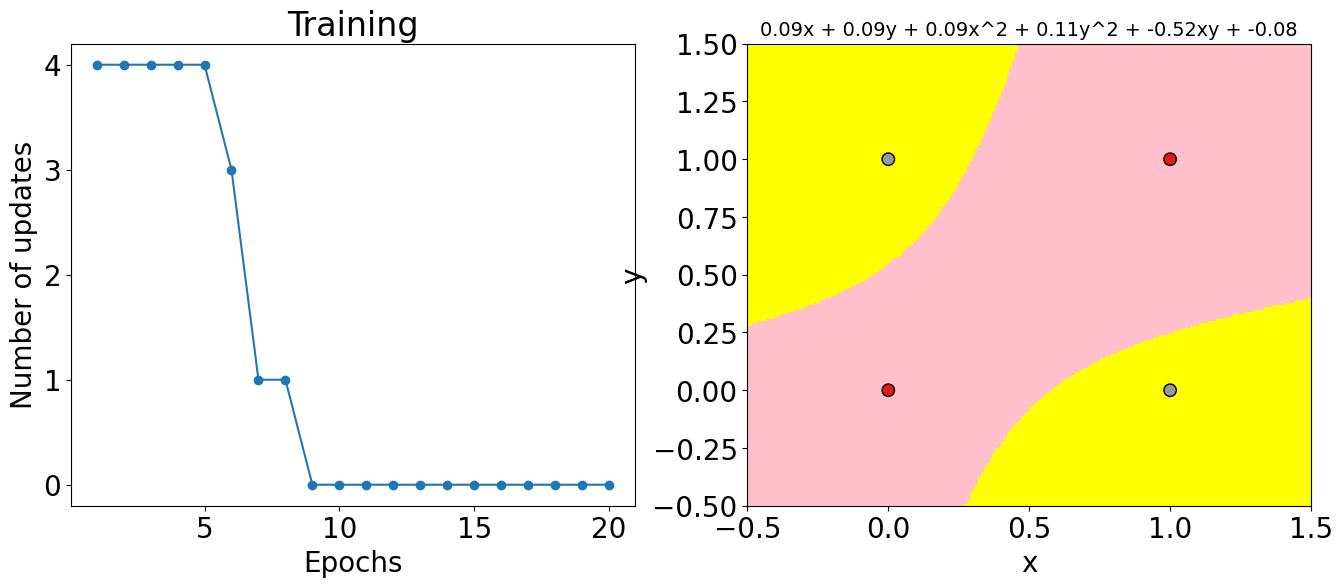

In [70]:
# Extend the training data
X_extended = np.array([[x[0], x[1], x[0]*x[0], x[1]*x[1], x[0]*x[1]] for x in X])

clf = Perceptron(eta=0.1, n_iter=20)
# Fit the data -- with extended samples
clf.fit(X_extended, y)

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot the errors
axs[0].plot(range(1, len(clf.errors_) + 1), clf.errors_, marker='o')

# Label the axis
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Number of updates')
axs[0].set_title('Training')


# Plot the decision surface

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
# Careful, now we need to extend all the samples in the "surface"
# used for plotting the decision function and surface
#surface = np.c_[xx.ravel(), yy.ravel()]
surface = []
for x_, y_ in zip(xx.ravel(), yy.ravel()):
    surface.append([x_, y_, x_*x_, y_*y_, x_*y_])
surface = np.array(surface)
Z = clf.predict(surface)
Z = Z.reshape(xx.shape)
cmap_light = ListedColormap(['pink', 'yellow'])
axs[1].pcolormesh(xx, yy, Z, cmap = cmap_light, shading = 'auto')

# Plot the output of linear classifier for training points
scatter = axs[1].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
             edgecolor='k', s=80)
axs[1].set_xlim(x_min, x_max)
axs[1].set_ylim(y_min, y_max)
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_title('{:.2f}x + {:.2f}y + {:.2f}x^2 + {:.2f}y^2 + {:.2f}xy + {:.2f}'.
                 format(clf.w_[1], clf.w_[2], clf.w_[3], clf.w_[4], clf.w_[5], clf.w_[0]), fontsize = "x-small")

plt.show()

### Exercise 4

**Multi-layer perceptron.** This is just a gentle introduction to the next workshop. Instead of forcing our samples in a higher-dimension hyperplane (and hoping they are linearly separable there), we can _chain_ single-layer perceptrons in a _network_: **artificial neural networks (ANN)**.

ANN can predict non-linear functions directly. But, stochastic gradient descent and other _weight optimisation approaches_ require differentiability... Which leads to a choice of _activation functions_.

For now, let's just make the appropriate imports and initialise a `sklearn` multi-layer perceptron classifier `clf`, with 2 hidden layers with 4 neurons each, and observe the output:
- `sklearn` implementation of multi-layer is located at [`sklearn.neural_network.MLPClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
- vary the learning rate $\eta \in \{0.1, 0.01, 0.001\}$ (argument `learning_rate_init`)
- hidden layer sizes are set with the parameter `hidden_layer_sizes`
- try different activation fuctions (start with `'tanh'`; lecture:`'logistic'` is the sigmoid, `'relu'` is the ReLU discussed in the lecture)
- use stochastic gradient descent (`solver` parameter)
- start with the maximum number of iterations `10000`, and then increase as needed
- parameter `tol` has to do with the tolerance: if the improvements are smaller than this number, the learning will stop -- try $\mathtt{tol} \in \{1e^{-4}, 1e^{-6}, 1e^{-8}, 1e^{-10}\}$
- parameter `alpha` has to do with regularisation, out of scope of today's workshop. use `0`
- momentum is also out of scope today, use `0`

_(Note: sklearn only has the support for very rudimentary neural networks; not fit beyond demonstration purposes. If you want to run your ANN models on your GPU or try out deep learning for images, you can look into frameworks such as `pytorch` or `TensorFlow` (and others)...)_

C:\Users\Computing\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


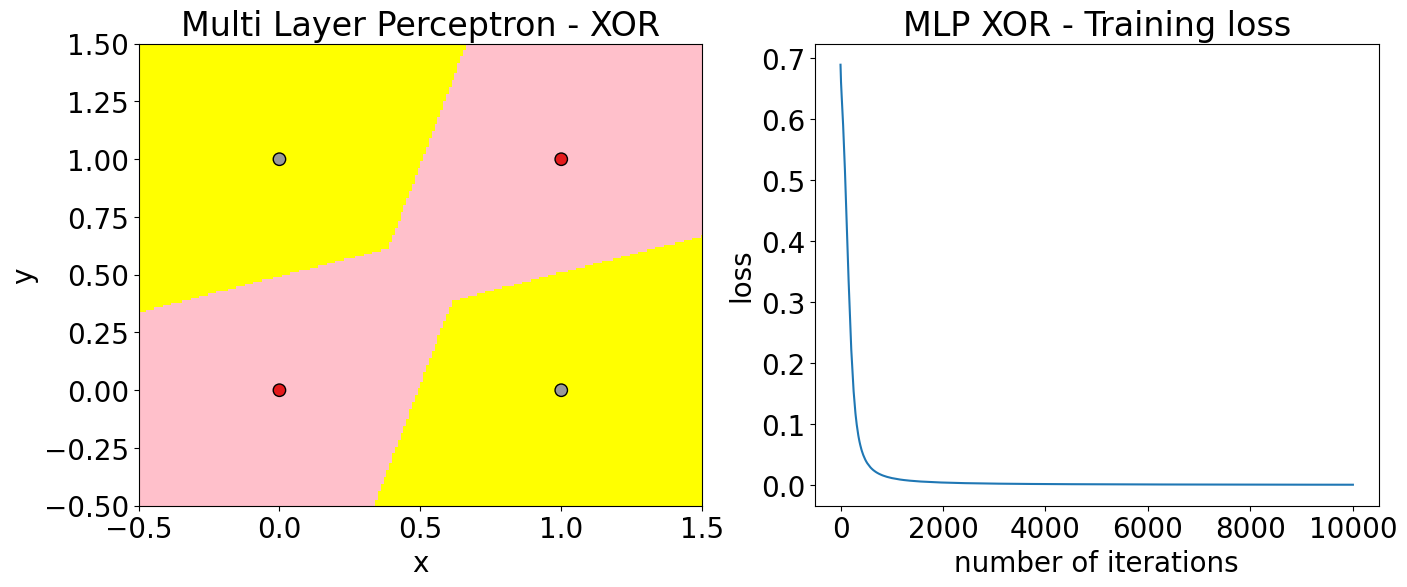

In [81]:
###########################
# make appropriate imports:
###########################
from sklearn.neural_network import MLPClassifier
###########################
# initialise the classifier:
###########################
clf = MLPClassifier(learning_rate_init=0.1, activation='relu', solver='sgd', max_iter=10000, tol=1e-10, alpha=0, momentum=0)

###########################
# below code fits the model
# to the data, and plots
# the results nothing needs
# to be changed
###########################
clf = clf.fit(X, y)

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot the decision surface
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
surface = np.c_[xx.ravel(), yy.ravel()]
Z = clf.predict(surface)
Z = Z.reshape(xx.shape)
cmap_light = ListedColormap(['pink', 'yellow'])
axs[0].pcolormesh(xx, yy, Z, cmap = cmap_light, shading = 'auto')

# Plot the ground truth
scatter = axs[0].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
             edgecolor='k', s=80)
axs[0].set_xlim(x_min, x_max)
axs[0].set_ylim(y_min, y_max)
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title('Multi Layer Perceptron - XOR')

axs[1].plot(clf.loss_curve_, '-')
axs[1].set_xlabel("number of iterations")
axs[1].set_ylabel("loss")
axs[1].set_title("MLP XOR - Training loss")

plt.show()

### References

[1] F. Rosenblatt. The perceptron, a perceiving and recognizing automaton Project Para. Cornell Aeronautical Laboratory, 1957.

[2] B. Widrow et al. Adaptive ”Adaline” neuron using chemical ”memistors”. Number Technical Report 1553-2. Stanford Electron. Labs., Stanford, CA, October 1960.